# Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import plotly as px
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


# Initial Data Exploration

In [7]:
df = pd.read_csv('diabetes.csv')
df.shape

(768, 9)

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.groupby(['Outcome']).agg({"Age":["mean", "median"],
                            "Glucose":["mean","median"],
                            "Pregnancies":["mean", "median"],
                            "BMI":["mean", "median"],
                            "SkinThickness":["mean", "median"]})

Age            Glucose        Pregnancies               BMI  \
              mean median        mean median        mean median       mean   
Outcome                                                                      
0        31.190000   27.0  109.980000  107.0    3.298000    2.0  30.304200   
1        37.067164   36.0  141.257463  140.0    4.865672    4.0  35.142537   

               SkinThickness         
        median          mean median  
Outcome                              
0        30.05     19.664000   21.0  
1        34.25     22.164179   27.0

# Data Visualization





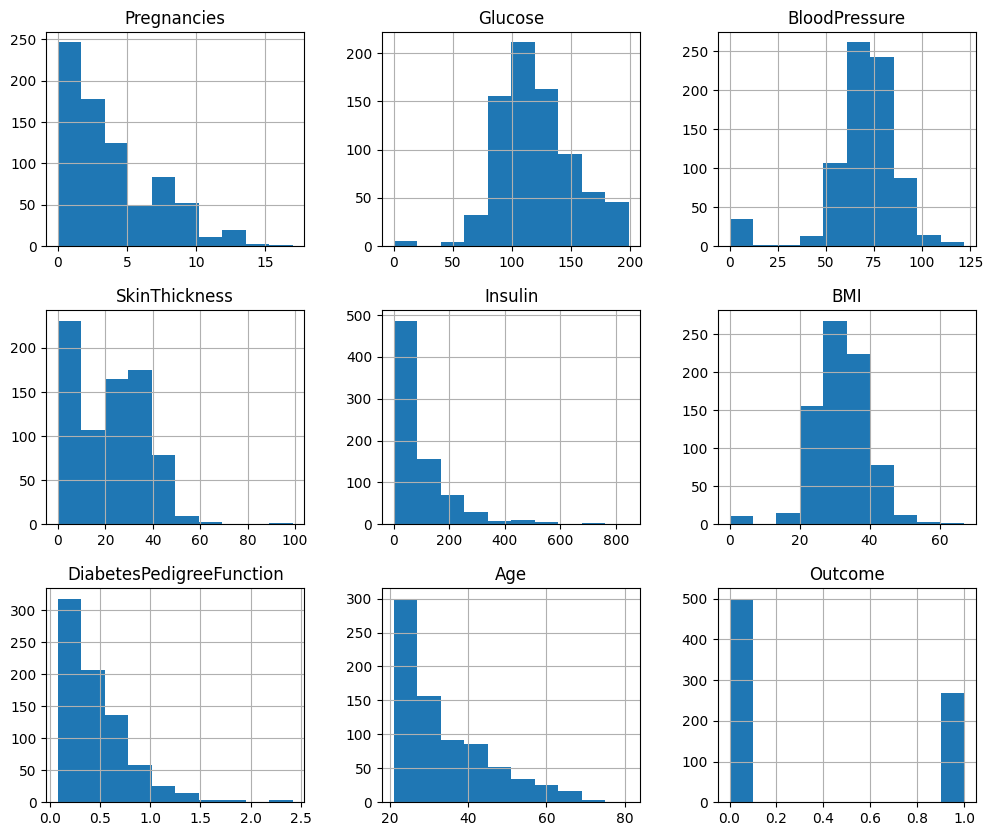

In [11]:
df.hist(figsize=(12, 10));

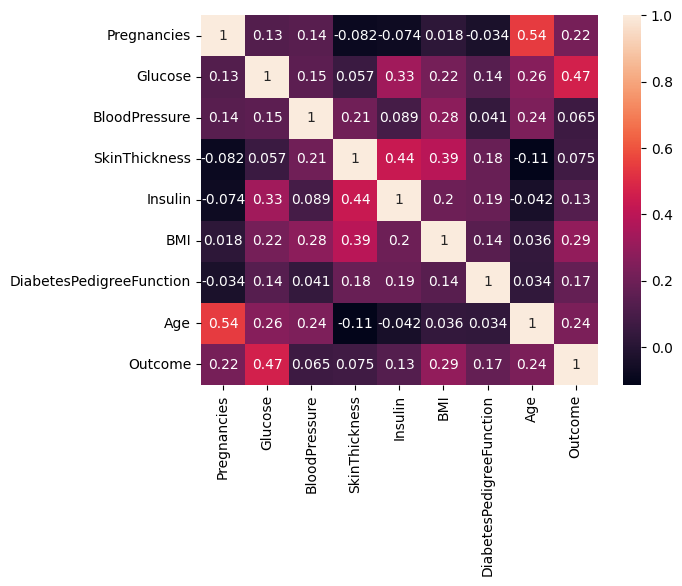

In [12]:
sns.heatmap(df.corr(), annot=True);

In [14]:
x = df.drop('Outcome', axis = 1)
y = df['Outcome']

# Feature Scaling

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, random_state=100)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Model Training

In [31]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(x_train, y_train)

KNeighborsClassifier()

# Model Evaluation

In [32]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.7532467532467533
